# INFO284 Machine Learning Eksamen, vår 2021
--- 
Kandiater: 
* 145
* 
* 
* 

---

### VIKTIG: 
#### The code shall in the end return the results of your experiments with your five chosen models and data sets. You need to explain:
- Important and relevant properties of the data 
- how you preprocessed data like which features you selected, which data points you dropped, did you go for a subset of the data, did you do dimension reduction, how you reformatted data, etc.
- how you decided on parameters for your machine learning models, did you use any regulation techniques
- how the five methods were measured and compared to each other

## Beskrivelse av datasett 

Link: https://www.kaggle.com/new-york-city/nyc-property-sales

---    


Sale Price er vår target feature 

*** 
#### Vi har valgt følgende 5 modeller for prediksjoner av dette datasettet:
1. K-nærmeste naboer
2. Decision Trees
3. Linear Regression
4. Feedforward Neural Network 1
5. Feedforward Neural Network 2 
---

## Kommandoer for å importere nødvendige pakker 
* <span style='background:black'> <span style='color:white'> pip install numpy </span>
* <span style='background:black'> <span style='color:white'> pip install pandas </span>
* <span style='background:black'> <span style='color:white'> pip install pandas-profiling </span>
* <span style='background:black'> <span style='color:white'> pip install sklearn </span>
* <span style='background:black'> <span style='color:white'> pip install seaborn </span>

## Preprocessing

In [1]:
# Importerer nødvenidge pakker
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('include/nyc-rolling-sales.csv', index_col=0, delimiter=',') 
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
5        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
7        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
8        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
4                   2A    392    6                                  C2   
5                    2    399   26                                  C7   
6                    2    399   39                                  C7   
7                   2B    402   21                                  C4   
8                   2A    404   55                                  C2   

                  ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
4            153 AVENUE B                   ...                  5   
5   234 EAST 4TH   STREET                   ...                 28   
6   197 EAST 3RD   STREET                   ...                 16   
7     154 EAST 7TH STREET                   ...                 10   
8  301 EAST 10TH   STREET                   ...                  6   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET GROSS SQUARE FEET  \
4                 0            5              1633              6440   
5                 3           31              4616             18690   
6                 1           17              2212              7803   
7                 0           10              2272              6794   
8                 0            6              2369              4615   

  YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
4       1900                          2                              C2   
5       1900                          2                              C7   
6       1900                          2                              C7   
7       1913                          2                              C4   
8       1900                          2                              C2   

  SALE PRICE            SALE DATE  
4    6625000  2017-07-19 00:00:00  
5        -    2016-12-14 00:00:00  
6        -    2016-12-09 00:00:00  
7    3936272  2016-09-23 00:00:00  
8    8000000  2016-11-17 00:00:00  

[5 rows x 21 columns]

#### Sjekker om noen kolonner er tomme (NaN)

In [3]:
print(df.isna().sum())

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


---
Ingen kolonner har NaN-verdier, men vi kan se fra df.head( ) at enkelte kolonner inneholder unyttig data som tomme celler og bindestreker. Disse kan gjøres om til NaN-verdier for å rense datasettet og gjøre det mer oversiktlig.

Vi kan se nærmere på dette i <b> Pandas Profile_Report </b>

In [4]:
df.profile_report() # Profile report

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Vi har kommet frem til at disse verdiene kan gjøres om til NaN-verdier:
* Tomme celler 
* 0 
* Bindestrek

In [5]:
df = df.replace(r'^\s*$', np.nan, regex=True) # Tomme celler
df = df.replace(0, np.nan)  # 0 
df["SALE PRICE"] = df["SALE PRICE"].replace(r'[@#&$%+-/*]', np.nan, regex=True) # Alt annet enn tall i sale price

In [6]:
print("Oppdatert sjekk på tomme kolonner:" + "\n", df.isna().sum())

Oppdatert sjekk på tomme kolonner:
 BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                 24783
COMMERCIAL UNITS                  79429
TOTAL UNITS                       19762
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64


In [7]:
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
5        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
7        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
8        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
4                   2A    392    6        NaN                        C2   
5                    2    399   26        NaN                        C7   
6                    2    399   39        NaN                        C7   
7                   2B    402   21        NaN                        C4   
8                   2A    404   55        NaN                        C2   

                  ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
4            153 AVENUE B              NaN  ...                5.0   
5   234 EAST 4TH   STREET              NaN  ...               28.0   
6   197 EAST 3RD   STREET              NaN  ...               16.0   
7     154 EAST 7TH STREET              NaN  ...               10.0   
8  301 EAST 10TH   STREET              NaN  ...                6.0   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET GROSS SQUARE FEET  \
4               NaN          5.0              1633              6440   
5               3.0         31.0              4616             18690   
6               1.0         17.0              2212              7803   
7               NaN         10.0              2272              6794   
8               NaN          6.0              2369              4615   

  YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
4     1900.0                          2                              C2   
5     1900.0                          2                              C7   
6     1900.0                          2                              C7   
7     1913.0                          2                              C4   
8     1900.0                          2                              C2   

  SALE PRICE            SALE DATE  
4    6625000  2017-07-19 00:00:00  
5        NaN  2016-12-14 00:00:00  
6        NaN  2016-12-09 00:00:00  
7    3936272  2016-09-23 00:00:00  
8    8000000  2016-11-17 00:00:00  

[5 rows x 21 columns]

In [8]:
# Kommentar: enkelte int-verdier blir gjort om til float etter df.replace( ) 
# Vet ikke grunnen til dette... 

#cols = ["RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "YEAR BUILT",  ]
#df[cols] = df[cols].applymap(np.int64)

In [9]:
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
5        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
7        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
8        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
4                   2A    392    6        NaN                        C2   
5                    2    399   26        NaN                        C7   
6                    2    399   39        NaN                        C7   
7                   2B    402   21        NaN                        C4   
8                   2A    404   55        NaN                        C2   

                  ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
4            153 AVENUE B              NaN  ...                5.0   
5   234 EAST 4TH   STREET              NaN  ...               28.0   
6   197 EAST 3RD   STREET              NaN  ...               16.0   
7     154 EAST 7TH STREET              NaN  ...               10.0   
8  301 EAST 10TH   STREET              NaN  ...                6.0   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET GROSS SQUARE FEET  \
4               NaN          5.0              1633              6440   
5               3.0         31.0              4616             18690   
6               1.0         17.0              2212              7803   
7               NaN         10.0              2272              6794   
8               NaN          6.0              2369              4615   

  YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
4     1900.0                          2                              C2   
5     1900.0                          2                              C7   
6     1900.0                          2                              C7   
7     1913.0                          2                              C4   
8     1900.0                          2                              C2   

  SALE PRICE            SALE DATE  
4    6625000  2017-07-19 00:00:00  
5        NaN  2016-12-14 00:00:00  
6        NaN  2016-12-09 00:00:00  
7    3936272  2016-09-23 00:00:00  
8    8000000  2016-11-17 00:00:00  

[5 rows x 21 columns]

### Ikke alle data points i settet er relevante for modellene i våre øyne. Derfor velger vi å fjerne følgende data points fra vår DataFrame: 
* 'Ease-ment'. (kun NaN) 
* 'Apartment number'. (70% av verdier er NaN og ikke relevant for target value). 
* Fjerner rader hvor 'Sale price' ikke er oppgitt
* 'Commerical Units'. 
--- 

#### Her kan vi se hvor mange NaN-verdier det er for data pointsene vi har valgt å fjerne

In [10]:
print("Easement: ", df['EASE-MENT'].isnull().sum(),  "/" , df.shape[0])
print("Apart. num: ", df['APARTMENT NUMBER'].isnull().sum(),  "/" , df.shape[0])
print("Sale Price:",  df['SALE PRICE'].isnull().sum(),  "/" , df.shape[0])

Easement:  84548 / 84548
Apart. num:  65496 / 84548
Sale Price: 14561 / 84548


In [11]:
# Fjerner irrelevante data points fra datasett

#Fjerner rader hvor sale price ikke er oppgitt  
#df = df[df["SALE PRICE"].str.contains("-")==False]
del df["EASE-MENT"]  
del df["APARTMENT NUMBER"]

#Vurderes:
#del df["COMMERCIAL UNITS"] # 79k/85k er 0/NaN
#del df["LOT"]
#del df["BLOCK"]

In [12]:
# Gjør om data i Borough (fra siffer til navn)
#df['BOROUGH']=df['BOROUGH'].replace({1:'Manhattan',2:'Bronx',3:'Brooklyn',4:'Queens',5:'Staten Island'})

df.sample(5)

BOROUGH             NEIGHBORHOOD  \
10328        3     DOWNTOWN-FULTON MALL   
14054        1  UPPER EAST SIDE (79-96)   
11528        1                  TRIBECA   
10388        1              MURRAY HILL   
8178         1             MIDTOWN EAST   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
10328  22 STORE BUILDINGS                                             4   
14054  10 COOPS - ELEVATOR APARTMENTS                                 2   
11528  13 CONDOS - ELEVATOR APARTMENTS                                2   
10388  13 CONDOS - ELEVATOR APARTMENTS                                2   
8178   10 COOPS - ELEVATOR APARTMENTS                                 2   

       BLOCK   LOT BUILDING CLASS AT PRESENT                     ADDRESS  \
10328    149    22                        K4           573 FULTON STREET   
14054   1542    19                        D4  333 EAST 79TH   STREET, 2R   
11528    217  1298                        R4             250 WEST STREET   
10388    910  1042                        R4        250 EAST 30TH STREET   
8178    1369    29                        D4      444 EAST 58 STREET, 5D   

       ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
10328   11201.0                NaN               1.0          1.0   
14054   10075.0                NaN               NaN          NaN   
11528   10013.0                1.0               NaN          1.0   
10388   10016.0                1.0               NaN          1.0   
8178    10022.0                NaN               NaN          NaN   

      LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT  \
10328             2500              5900      1915.0   
14054              -                 -        1961.0   
11528              -                 -        1906.0   
10388              -                 -        2001.0   
8178               -                 -        1920.0   

       TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  \
10328                          4                             K4          0   
14054                          2                             D4     567000   
11528                          2                             R4    8600000   
10388                          2                             R4     590000   
8178                           2                             D4     515000   

                 SALE DATE  
10328  2017-03-29 00:00:00  
14054  2016-11-09 00:00:00  
11528  2016-10-18 00:00:00  
10388  2017-05-24 00:00:00  
8178   2017-01-03 00:00:00

#### Som nevnt er 'Sale Price' vår target feature. Her kan vi hvordan prisene er distribuert .

TypeError: 'value' must be an instance of str or bytes, not a float

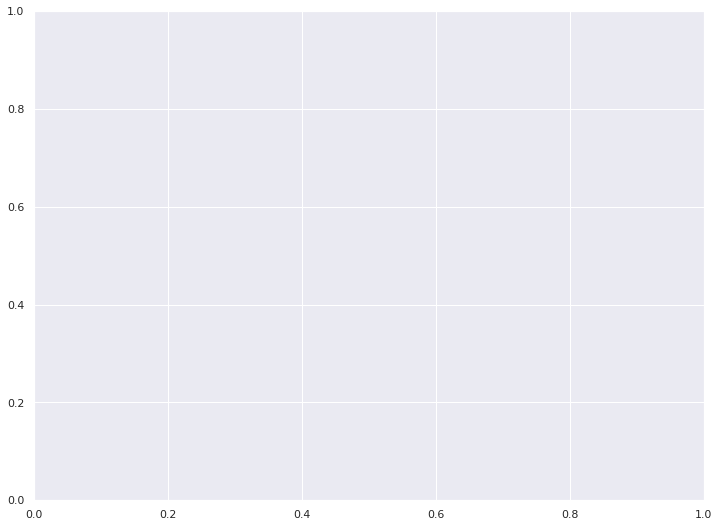

In [13]:
sns.set(rc={'figure.figsize':(12,9)})
plt.hist(df['SALE PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

# Model 1: KNN

In [ ]:
# code

# Model 2: Decision Trees

In [ ]:
# code

# Model 3 Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#### Kopierer datasett for modell 

In [ ]:
df3 = df.copy()

#### Correlation_matrix for å se hvilke data som har høyest korrelasjon mellom seg. 

In [ ]:
correlation_matrix = df3.corr().round(2)

sns.set(rc={"figure.figsize":(12,9)})

# annot = True to point the value inside square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

#### Her ser vi følgende: 
* Residental Units og Total Units har høyest korrelasjon
* Commerical og Total Units
* Block og Borough 

# Model 4 : Feedforward Neural Network 1

In [ ]:
# code

# Model 5 : Feedforward Neural Network 2

In [ ]:
# code